In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import floor, sqrt, ceil


In [2]:
df = pd.read_csv('data/all_matches_2022.csv')
# https://www.kaggle.com/datasets/arthur1511/lol-esports-2022

C:\Users\guilh\AppData\Local\Temp\ipykernel_12676\2369331098.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/all_matches_2022.csv')


In [3]:
df.head(20)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
5,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,135.0,-391.0,-345.0,-14.0,0.0,1.0,0.0,0.0,1.0,0.0
6,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,89.0,-541.0,275.0,11.0,0.0,5.0,1.0,2.0,3.0,2.0
7,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,120.0,475.0,-153.0,-1.0,3.0,3.0,2.0,0.0,3.0,0.0
8,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,115.0,793.0,1343.0,34.0,3.0,3.0,0.0,2.0,1.0,2.0
9,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,28.0,-443.0,497.0,-7.0,0.0,6.0,2.0,1.0,2.0,2.0


In [4]:
leagues = ['LCK', 'SL', 'LCK CL', 'NLC', 'PRM', 'VCS', 'LMF', 'LCS', 'PCS', 'LFL','CBLOL', 'LEC', 'LAS', 'TCL', 'LJL', 'LCO', 'LPLOL', 'NEXO', 'LLA', 'EBL', 'GL', 'PGN', 'WCS','MSI', 'CDF','LCL']

filtered_df = df.loc[
        (df['position'] == 'team') &
        (df['datacompleteness'] == 'complete') &
        (df['league'].isin(leagues)) &
        (df['year'] == 2022)
    ]

In [5]:
removed_columns = [
        'datacompleteness', 
        'position',
        'gameid',
        'year',
        'url',
        'date',
        'playerid',
        'split',
        'playoffs',
        'patch',
        'participantid',
        'playername',
        'teamid',
        'champion',
        'firstbloodkill',
        'firstbloodassist',
        'firstbloodvictim',
        'dragons (type unknown)',
        'damageshare',
        'earnedgold',
        'earned gpm',
        'earnedgoldshare',
        'goldspent',
        'gspd',
        'total cs',
        'monsterkillsownjungle',
        'monsterkillsenemyjungle',
        'damagetochampions',
        'wardskilled',
        'visionscore',
        'goldat10',
        'xpat10',
        'csat10',
        'opp_goldat10',
        'opp_xpat10',
        'opp_csat10',
        'goldat15',
        'xpat15',
        'csat15',
        'opp_goldat15',
        'opp_xpat15',
        'opp_csat15',
        'wardsplaced',
    ]

filtered_df = filtered_df.drop(columns=removed_columns)

In [6]:
divide_per_time = [
    'totalgold',
    'minionkills',
    'monsterkills',
    'controlwardsbought'
]
for column in divide_per_time:
    filtered_df[column] = filtered_df[column] / (filtered_df['gamelength']/60)

filtered_df['gamelength'] = filtered_df['gamelength'] / 60

In [7]:
new_names = {}
for column in divide_per_time:
    new_names[column] = column + '_per_minute'


filtered_df = filtered_df.rename(columns=new_names)


In [8]:
non_normalizable_columns = [
        'league',
        'game',
        'side',
        'teamname',
        'ban1',
        'ban2',
        'ban3',
        'ban4',
        'ban5',
        'result',
        'firstblood',
        'firstdragon',
        'firstherald',
        'firstbaron',
        'firsttower',
        'firstmidtower',
        'firsttothreetowers',
]

normalizable_columns = list(filter(
    lambda column : non_normalizable_columns.count(column) == 0, 
    list(filtered_df.columns)
))

for column in normalizable_columns: 
        filtered_df[column] = (filtered_df[column] - filtered_df[column].mean()) / filtered_df[column].std()

Analisando atributos com maior correlação em relação a coluna alvo 'result'

In [9]:
top15pearsonCorrelations =  filtered_df.corr(numeric_only=True)['result'].sort_values().tail(16)
top15pearsonCorrelations

golddiffat15               0.540542
firsttothreetowers         0.555000
monsterkills_per_minute    0.565751
elementaldrakes            0.586517
dragons                    0.587794
doublekills                0.594394
barons                     0.628934
firstbaron                 0.663992
team kpm                   0.681801
assists                    0.682777
teamkills                  0.686663
kills                      0.686663
inhibitors                 0.749887
totalgold_per_minute       0.826226
towers                     0.885757
result                     1.000000
Name: result, dtype: float64

Filtrando novas colunas baseado nas correlações analisadas

In [10]:
final_columns = list(top15pearsonCorrelations.keys())
filtered_df = filtered_df.loc[:, final_columns]
filtered_df.describe()

,golddiffat15,firsttothreetowers,monsterkills_per_minute,elementaldrakes,dragons,doublekills,barons,firstbaron,team kpm,assists,teamkills,kills,inhibitors,totalgold_per_minute,towers,result
count,12000.000000,12000.000000,1.200000e+04,1.191200e+04,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,12000.000000
mean,0.000000,0.500000,-4.263256e-17,1.622462e-16,-5.684342e-17,2.368476e-17,1.776357e-18,0.475083,5.684342e-17,-9.947598e-17,-1.136868e-16,-1.136868e-16,-4.144833e-17,3.789561e-16,-5.684342e-17,0.500000
std,1.000000,0.500021,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499400,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500021
min,-4.864279,0.000000,-3.736063e+00,-1.659638e+00,-1.633802e+00,-1.032706e+00,-9.325893e-01,0.000000,-1.792247e+00,-1.777234e+00,-1.917098e+00,-1.917098e+00,-8.515699e-01,-2.606794e+00,-1.669662e+00,0.000000
25%,-0.616726,0.000000,-6.890593e-01,-9.088270e-01,-9.116532e-01,-1.032706e+00,-9.325893e-01,0.000000,-7.641840e-01,-8.168699e-01,-8.159503e-01,-8.159503e-01,-8.515699e-01,-8.591696e-01,-8.425735e-01,0.000000
50%,0.000000,0.500000,-1.000332e-02,-1.580158e-01,-1.895040e-01,-3.960519e-01,4.425731e-01,0.000000,-1.263937e-01,-2.598162e-02,9.910328e-03,9.910328e-03,6.066352e-02,-2.503037e-02,2.602113e-01,0.500000
75%,0.616726,1.000000,6.820915e-01,5.927955e-01,5.326452e-01,8.772564e-01,4.425731e-01,1.000000,6.154491e-01,7.084146e-01,6.981275e-01,6.981275e-01,9.728969e-01,7.893868e-01,8.116037e-01,1.000000
max,4.864279,1.000000,3.656554e+00,1.343607e+00,2.699093e+00,5.970490e+00,4.568060e+00,1.000000,6.259615e+00,4.832332e+00,4.414500e+00,4.414500e+00,6.446297e+00,4.153295e+00,1.362996e+00,1.000000


 Usando holdhout

In [11]:

sampled_df = filtered_df.sample(frac=1)

size = len(sampled_df) 
train_size = floor(size * 0.9)
test_size = size - train_size
train_df = sampled_df.head(train_size)
test_df = sampled_df.tail(test_size)

test_df = test_df.drop(columns='result')
train_df.describe()

,golddiffat15,firsttothreetowers,monsterkills_per_minute,elementaldrakes,dragons,doublekills,barons,firstbaron,team kpm,assists,teamkills,kills,inhibitors,totalgold_per_minute,towers,result
count,10800.000000,10800.000000,10800.000000,10720.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,0.005466,0.501852,0.002094,0.007275,0.005877,0.002211,-0.000025,0.476204,0.003370,0.003902,0.003704,0.003704,0.003902,0.001487,0.003559,0.501759
std,1.001142,0.500020,1.000815,0.998674,0.998159,0.999759,0.996731,0.499457,1.001207,1.001799,1.001495,1.001495,1.002973,1.003269,1.000957,0.500020
min,-4.864279,0.000000,-3.736063,-1.659638,-1.633802,-1.032706,-0.932589,0.000000,-1.792247,-1.777234,-1.917098,-1.917098,-0.851570,-2.606794,-1.669662,0.000000
25%,-0.611633,0.000000,-0.685657,-0.908827,-0.911653,-1.032706,-0.932589,0.000000,-0.764488,-0.816870,-0.815950,-0.815950,-0.851570,-0.858300,-0.842574,0.000000
50%,0.004204,1.000000,-0.009102,-0.158016,-0.189504,-0.396052,0.442573,0.000000,-0.120315,-0.025982,0.009910,0.009910,0.060664,-0.023325,0.260211,1.000000
75%,0.623841,1.000000,0.685779,0.592795,0.532645,0.877256,0.442573,1.000000,0.619502,0.708415,0.698128,0.698128,0.972897,0.790019,0.811604,1.000000
max,4.864279,1.000000,3.656554,1.343607,2.699093,5.970490,4.568060,1.000000,6.259615,4.832332,4.414500,4.414500,6.446297,3.677020,1.362996,1.000000


Realizando o KNN do teste_df para o train_df

In [12]:
test_rows = test_df.copy(deep=True)
test_columns = test_df.columns.values

responses = {}
for k in range(1, 20, 2):
    responses[k] = []

for _, test_row in test_rows.iterrows():
    def dist(train_row):    
        row_dist = 0
        for c in test_columns:
            row_dist += abs(train_row[c] - test_row[c])
        return row_dist

    distances = train_df.apply(dist, axis=1)

    sorted_dists = distances.sort_values()

    for k in range(1, 20, 2):
        
        topk_dists = sorted_dists.head(k)
        topk_indexes = topk_dists.keys()

        k_neighbours_df = train_df.loc[topk_indexes, 'result']

        res = int(k_neighbours_df.sum() >= ceil(k/2))
        responses[k].append(res)

for k in range(1, 20, 2):
    test_rows['result' + str(k)] = responses[k]

In [ ]:
for k in range(1, 20, 2):
    conf_mat = pd.crosstab(
        test_rows['result' + str(k)],
        sampled_df.loc[test_rows.index,]['result'], 
        rownames=['Valor predito'],
        colnames=['Valor real']
        )
    print(f"Para K = {k}:")
    print(conf_mat)
    vp = conf_mat[1][1]
    fp = conf_mat[0][1]
    vn = conf_mat[0][0]
    fn = conf_mat[1][0]
    # print(vp, fp, vn, fn, sep=" ")
    sensitividade = (vp / (vp + fn)) * 100
    especificidade = (vn / (vn + fp)) * 100
    print(f"Sensitividade = {round(sensitividade, 2)}%")
    print(f"Especificidade = {round(especificidade, 2)}%", end="\n\n")


Para K = 1:
Valor real       0    1
Valor predito          
0              568   18
1               33  581
Sensitividade = 96.99%
Especificidade = 94.51%

Para K = 3:
Valor real       0    1
Valor predito          
0              574   16
1               27  583
Sensitividade = 97.33%
Especificidade = 95.51%

Para K = 5:
Valor real       0    1
Valor predito          
0              566    6
1               35  593
Sensitividade = 99.0%
Especificidade = 94.18%

Para K = 7:
Valor real       0    1
Valor predito          
0              569    9
1               32  590
Sensitividade = 98.5%
Especificidade = 94.68%

Para K = 9:
Valor real       0    1
Valor predito          
0              569    8
1               32  591
Sensitividade = 98.66%
Especificidade = 94.68%

Para K = 11:
Valor real       0    1
Valor predito          
0              568    9
1               33  590
Sensitividade = 98.5%
Especificidade = 94.51%

Para K = 13:
Valor real       0    1
Valor predito          
0    

Realizando árvore de decisão

In [ ]:
from sklearn import tree

train_df = train_df.loc[train_df['elementaldrakes'].notna(),]
test_rows = test_rows.loc[test_rows['elementaldrakes'].notna(), ]

x_train = train_df.loc[:, test_columns]
y_train = train_df.result

x_test = test_rows.loc[:, test_columns]
y_test = sampled_df.loc[test_rows.index,]['result']



classificador = tree.DecisionTreeClassifier()

classificador = classificador.fit(x_train, y_train)


y_pred = classificador.predict(x_test)

[Text(0.2740087737877998, 0.9761904761904762, 'x[14] <= 0.122\ngini = 0.5\nsamples = 10722\nvalue = [5361, 5361]'),
 Text(0.08772158498435871, 0.9285714285714286, 'x[12] <= -0.395\ngini = 0.027\nsamples = 5127\nvalue = [5058, 69]'),
 Text(0.08355057351407716, 0.8809523809523809, 'gini = 0.0\nsamples = 4909\nvalue = [4909, 0]'),
 Text(0.09189259645464025, 0.8809523809523809, 'x[13] <= -0.0\ngini = 0.433\nsamples = 218\nvalue = [149, 69]'),
 Text(0.0586548488008342, 0.8333333333333334, 'x[4] <= 1.616\ngini = 0.287\nsamples = 150\nvalue = [124, 26]'),
 Text(0.038060479666319084, 0.7857142857142857, 'x[9] <= -0.224\ngini = 0.242\nsamples = 142\nvalue = [122, 20]'),
 Text(0.016684045881126174, 0.7380952380952381, 'x[5] <= 0.559\ngini = 0.055\nsamples = 71\nvalue = [69, 2]'),
 Text(0.008342022940563087, 0.6904761904761905, 'x[12] <= 0.517\ngini = 0.029\nsamples = 69\nvalue = [68, 1]'),
 Text(0.004171011470281543, 0.6428571428571429, 'gini = 0.0\nsamples = 66\nvalue = [66, 0]'),
 Text(0.01251

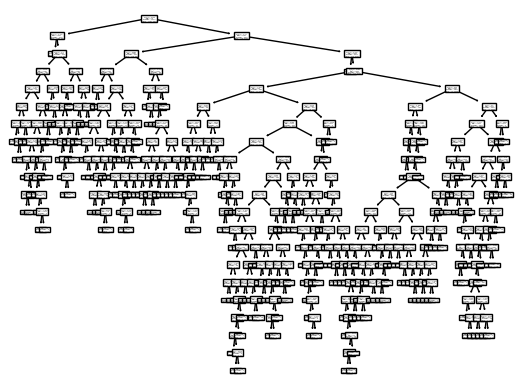

In [ ]:
tree.plot_tree(classificador)

In [ ]:
conf_mat = pd.crosstab(
    y_pred,
    y_test, 
    rownames=['Valor predito'],
    colnames=['Valor real']
    
)
print(conf_mat)
vp = conf_mat[1][1]
fp = conf_mat[0][1]
vn = conf_mat[0][0]
fn = conf_mat[1][0]
# print(vp, fp, vn, fn, sep=" ")
sensitividade = (vp / (vp + fn)) * 100
especificidade = (vn / (vn + fp)) * 100
print(f"Sensitividade = {round(sensitividade, 2)}%")
print(f"Especificidade = {round(especificidade, 2)}%", end="\n\n")

Valor real       0    1
Valor predito          
0              568   17
1               27  578
Sensitividade = 97.14%
Especificidade = 95.46%

